In [85]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import CubicSpline

mi = 4*np.pi*1e-7 #permeabilidade magnetica do ar

#parametros para o caso real
H=np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500,2500,4000, 5000,9000, 12000,20000,25000])
B=np.array([0, 0.733, 1.205, 1.424, 1.517, 1.56, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.762, 1.770, 1.8, 1.816])

#parametros para o caso ideal
H_linear=np.array([0, 68])
B_linear=np.array([0, 0.733])

NumPontos = 100 # numero de pontos da função

H_real = CubicSpline(B,H, bc_type='natural') #H_real
H_linear = CubicSpline(B_linear,H_linear, bc_type='natural') #H_linear

angulos = np.array([-29.99, -20.0, -10.0, 0.0, 10.0, 20.0, 29.99])

#parametros do sistema
g = 0.45e-3 # comprimento do entreferro
R_r = 6.3e-2 # radio do rotor
D = 8e-2 # profundidade da sessão reta
N = 90 # numero de espiras
A_max = (R_r + g) * D * 30 * np.pi / 180 #area maxima quando alinhado
l_ferro = 70e-2
A_util = np.zeros(len(angulos))

for i in range(0, len(angulos)):
    A_util[i] = R_r * D * (30 - abs(angulos[i])) * np.pi / 180

I_real       = np.zeros(NumPontos)
I_ideal      = np.zeros(NumPontos)
Fluxo_conc   = np.zeros(NumPontos)
B_ar          = np.zeros(NumPontos)
B_fe           = np.zeros(NumPontos)

Questão 1: Apresente um gráfico do fluxo ocncatenado na bobina 1 em função da corrente aplicada nessa bobina considerando a posição do rotor variando da posição de -30 a 30 graus em passos de 10 graus.

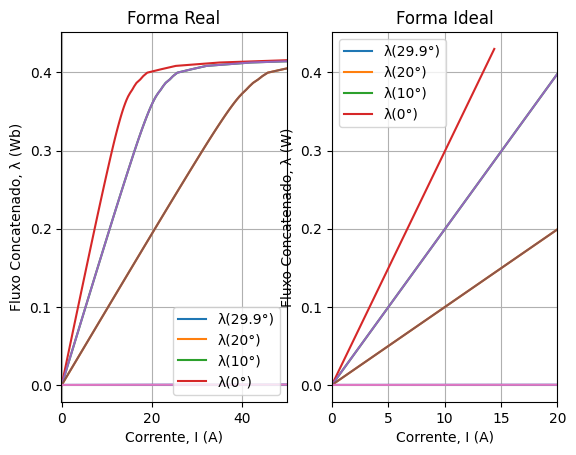

In [86]:
for i in range(0, len(A_util)):
    Area_proporcional = A_max/(A_util[i]) #proporcionalidade que deve ser mantida para que o fluxo entre o ar e o ferro seja igual
    for ponto in range(0, NumPontos):
        B_fe[ponto] = (1.816/NumPontos) * ponto # divide a curva de 0 a 1.816T em NumPontos segmentos e encontra o valor no ponto da iteração
        B_ar[ponto] = B_fe[ponto] * Area_proporcional # para menter o fluxo constante, a densidade do fluxo do ar aumenta de forma inversamente proporcional a area util
        Fluxo_conc[ponto] = N * A_max * B_fe[ponto] # fluxo concatenado = N * A * B
        I_real[ponto] = 1/N * ((B_ar[ponto]*2*g/mi) + H_real(B_fe[ponto])*l_ferro) # considerando o ferro e o entreferro
        I_ideal[ponto] = 1/N * (B_ar[ponto]*2*g/mi) #considerando apenas o entreferro com u -> infinito
    
    plt.subplot(1,2,1)
    plt.plot(I_real, Fluxo_conc)
    plt.xlim([-0.1,50])
    plt.legend(["λ(29.9°)", "λ(20°)", "λ(10°)", "λ(0°)"], loc = "best", prop={'size':10})
    plt.xlabel('Corrente, I (A)')
    plt.ylabel('Fluxo Concatenado, λ (Wb)')
    plt.title('Forma Real')
    plt.grid(True)
    plt.subplot(1,2,2)
    plt.plot(I_ideal, Fluxo_conc)
    plt.xlim([-0.01,20])
    plt.legend(["λ(29.9°)", "λ(20°)", "λ(10°)", "λ(0°)"], loc = "best", prop={'size':10})
    plt.grid(True)
    plt.xlabel('Corrente, I (A)')
    plt.ylabel('Fluxo Concatenado, λ (W)')
    plt.title('Forma Ideal')


Questão 2: Determine qual deve ser a corrente aplicada na bobina de modo a obter uma densidade de fluxo de 1.8T quando o rotor estiver na posição zero graus

In [87]:
# considerando que a o rotor esta em zero graus, a area util do entreferro é igual a area maxima, portanto Bf = Bar,
B_fixo = 1.8
Iop_real = (1/N) * ((2*g*B_fixo/mi) + (H_real(B_fixo)*l_ferro))
Iop_ideal = (1/N) * (2*g*B_fixo/mi)
#print("valor da parte do ar = {:.3f}".format((2*g*B_fixo/mi)))
#print("valor da parte do nucleo = {:.3f}".format((H_real(B_fixo)*l_ferro)))
print("Para o caso real, I = {:.3f}".format(Iop_real))
print("Para o caso real, I = {:.3f}".format(Iop_ideal))

Para o caso real, I = 169.880
Para o caso real, I = 14.324


Text(0.5, 0, 'Teta(Θ°)')

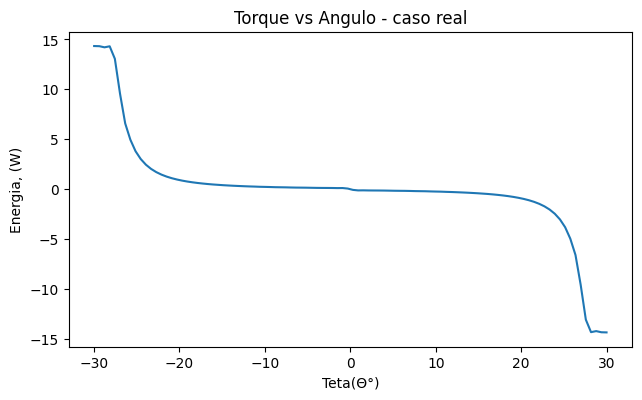

In [88]:
#calcular o valor da coenergia para cada theta, recalcular corrente para mais pontos entre theta min e max
#calcular a coenergia fazendo integração numero de lambda(i, theta)di
#calcular o toruqe fazendo derivadação parcial em theta considerando i constante

angulos_torque = np.linspace(-29.99, 29.99, NumPontos) # aumenta a densidade de pontos
angulos_torque_rad = np.deg2rad(angulos_torque)
I_real_torque = np.zeros(NumPontos)
I_ideal_torque = np.zeros(NumPontos)
Fluxo_conc_torque = np.zeros(NumPontos)
A_util_torque = np.zeros(NumPontos)
CoEnergia_ideal = np.zeros(NumPontos)
CoEnergia_real = np.zeros(NumPontos)


############################# TRECHO ABAIXO IGUAL AO DA PRIMEIRA QUESTAO, RECALCULANDO PARA MAIS VALORES DE THETA #############################
for i in range(0, len(angulos_torque)):
    A_util_torque[i] = R_r * D * (30 - abs(angulos_torque[i])) * np.pi / 180

for i in range(0, len(A_util_torque)):
    Area_proporcional = A_max/(A_util_torque[i])
    for ponto in range(0, NumPontos):
        B_fe[ponto] = (1.816/NumPontos) * ponto
        B_ar[ponto] = B_fe[ponto] * Area_proporcional
        Fluxo_conc_torque[ponto] = N * A_max * B_fe[ponto]
        I_real_torque[ponto] = 1/N * ((B_ar[ponto]*2*g/mi) + H_real(B_fe[ponto])*l_ferro)
        I_ideal_torque[ponto] = 1/N * (B_ar[ponto]*2*g/mi)
###############################################################################################################################################

    #interpolação corrente x fluxo
    fluxo_corrente_real = CubicSpline(I_real_torque, Fluxo_conc_torque, bc_type='natural')
    fluxo_corrente_ideal = CubicSpline(I_ideal_torque, Fluxo_conc_torque, bc_type='natural')

    #reta de 0 a corrente maxima definida no item anterior
    I_vec = np.linspace(0, Iop_real, NumPontos) #por enquanto considerar o valor da corrente apenas do caso real

    fluxo_real = fluxo_corrente_real(I_vec)
    fluxo_ideal = fluxo_corrente_ideal(I_vec)

    #essa porra aqui calcula energia ao inves de coenergia
    #CoEnergia_real[i] = sp.integrate.trapezoid(I_vec, fluxo_real)
    #CoEnergia_ideal[i] = sp.integrate.trapezoid(I_vec, fluxo_ideal)

    #coenergia
    CoEnergia_real[i] = sp.integrate.trapezoid(fluxo_real, I_vec)
    CoEnergia_ideal[i] = sp.integrate.trapezoid(fluxo_ideal, I_vec)

InterPol_CoEnergiaReal = CubicSpline(angulos_torque, CoEnergia_real, bc_type = 'natural')
InterPol_CoEnergiaIdeal = CubicSpline(angulos_torque, CoEnergia_ideal, bc_type = 'natural')

Torque_real = InterPol_CoEnergiaReal.derivative()(angulos_torque)
Torque_ideal = InterPol_CoEnergiaIdeal.derivative()(angulos_torque)

plt.figure(figsize=(16, 9))
plt.subplot(2, 2, 1)
plt.plot(angulos_torque, Torque_real)
plt.title("Torque vs Angulo - caso real")
plt.ylabel("Energia, (W)")
plt.xlabel("Teta(Θ°)")

Torque x angulo caso ideal

Text(0, 0.5, 'Torque, (T)')

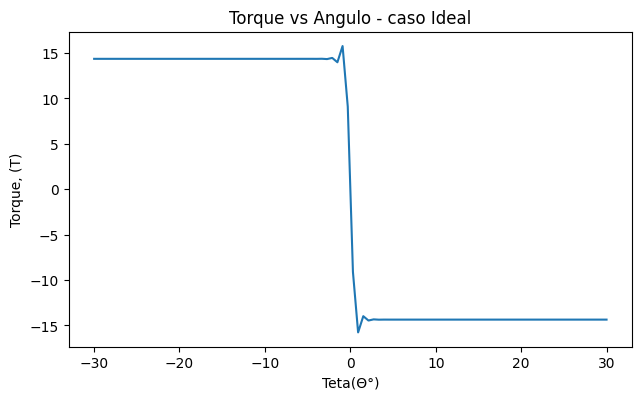

In [89]:
plt.figure(figsize=(16, 9))
plt.subplot(2, 2, 2)
plt.plot(angulos_torque, Torque_ideal)
plt.title("Torque vs Angulo - caso Ideal")
plt.xlabel("Teta(Θ°)")
plt.ylabel("Torque, (T)")

sequencia de ativação das bobinas para 100rpm

In [ ]:
## a bobina deve ser acionada quando esta a 30 graus da proxima fase e desativada quando esta em fase com o rotor
## considerando sentido anti horario 
## considera-se que o rotor esta inicialmente desalinhado -30 graus (direita) com a bobina 1

## 100 voltas - 60 segundos
## 1 volta - x segundos
## x = 60/100

rpm = 100
periodo_volta = 60/rpm
bobina_ativa = 1
pos_inicial = -30
pos_final = 360
acionamentos = 360/30
periodo_acionamento_ms = periodo_volta*1e3/acionamentos
for i in range(pos_inicial, pos_final, 30):
    print("entre os angulos {} e {}, sera aplicado corrente na bobina {}".format(i, i+30, bobina_ativa))
    bobina_ativa = 1 if bobina_ativa > 2 else bobina_ativa + 1
print("As bobinas devem ser acionadas a cada {:.2f}ms".format(periodo_acionamento_ms))

entre os angulos -30 e 0, sera aplicado corrente na bobina 1
entre os angulos 0 e 30, sera aplicado corrente na bobina 2
entre os angulos 30 e 60, sera aplicado corrente na bobina 3
entre os angulos 60 e 90, sera aplicado corrente na bobina 1
entre os angulos 90 e 120, sera aplicado corrente na bobina 2
entre os angulos 120 e 150, sera aplicado corrente na bobina 3
entre os angulos 150 e 180, sera aplicado corrente na bobina 1
entre os angulos 180 e 210, sera aplicado corrente na bobina 2
entre os angulos 210 e 240, sera aplicado corrente na bobina 3
entre os angulos 240 e 270, sera aplicado corrente na bobina 1
entre os angulos 270 e 300, sera aplicado corrente na bobina 2
entre os angulos 300 e 330, sera aplicado corrente na bobina 3
entre os angulos 330 e 360, sera aplicado corrente na bobina 1
As bobinas devem ser acionadas a cada 50.00ms
